In [1]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

%matplotlib inline
sns.set_style("dark")
sns.set(rc={'figure.figsize':(12,8)})
pd.set_option('display.max_colwidth', None)

import warnings
warnings.filterwarnings('ignore')

from utils import sequential_feature_selector, SelectorType

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score
from sklearn.svm import SVC
from sklearn.decomposition import PCA

In [21]:
df = pd.read_csv("data/train.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [14]:
def convert_types(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Converts categorical variables to their appropriate type
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        the final dataframe with corrected categorical data types
    '''

    df_copy = df.copy(deep=True)
    df_copy['blue'] = df.blue.astype('category')
    df_copy['dual_sim'] = df.dual_sim.astype('category')
    df_copy['four_g'] = df.four_g.astype('category')
    df_copy['three_g'] = df.three_g.astype('category')
    df_copy['touch_screen'] = df.touch_screen.astype('category')
    df_copy['wifi'] = df.wifi.astype('category')
    return df_copy

In [22]:
df.loc[df['price_range'] == 1, 'price_range'] = 0
df.loc[df['price_range'].isin([2, 3]), 'price_range'] = 1
df['price_range'].unique()

array([0, 1], dtype=int64)

In [23]:
df_X = df.drop('price_range', axis=1)
df_y = df['price_range']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,test_size=0.2, stratify=df_y, random_state=42)
print("Train size: ", X_train.shape, y_train.shape)
print("Test size: ", X_test.shape, y_test.shape)

Train size:  (1600, 20) (1600,)
Test size:  (400, 20) (400,)


In [6]:
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
# X_test_scaled = scaler.transform(X_test)
# X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [24]:
X_train = convert_types(X_train)
X_test = convert_types(X_test)

In [26]:
selected_cols_forward_selection = sequential_feature_selector(estimator=LogisticRegression(), n_features_to_select=5,
                                            direction=SelectorType.forward, X=X_train, y=y_train)
print(selected_cols_forward_selection)

['ram', 'battery_power', 'px_width', 'px_height', 'mobile_wt']


In [42]:
selected_cols_backward_selection = sequential_feature_selector(estimator=LogisticRegression(), n_features_to_select=5,
                                            direction=SelectorType.backward, X=X_train, y=y_train)
print(selected_cols_backward_selection)

['battery_power', 'mobile_wt', 'px_height', 'px_width', 'ram']


In [27]:
X_train_selected = X_train[selected_cols_forward_selection]
X_test_selected = X_test[selected_cols_forward_selection]

In [28]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train_selected, y_train)
predictions = model_logistic.predict(X_test_selected)
print(classification_report(y_test, predictions, digits=4))

              precision    recall  f1-score   support

           0     0.9851    0.9950    0.9900       200
           1     0.9949    0.9850    0.9899       200

    accuracy                         0.9900       400
   macro avg     0.9900    0.9900    0.9900       400
weighted avg     0.9900    0.9900    0.9900       400



In [25]:
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

model_logistic = LogisticRegression()
model_logistic.fit(X_train_pca, y_train)
predictions_pca = model_logistic.predict(X_test_pca)
print(classification_report(y_test, predictions_pca, digits=4))

              precision    recall  f1-score   support

           0     0.9851    0.9950    0.9900       200
           1     0.9949    0.9850    0.9899       200

    accuracy                         0.9900       400
   macro avg     0.9900    0.9900    0.9900       400
weighted avg     0.9900    0.9900    0.9900       400



## Feature Engineering

<AxesSubplot:>

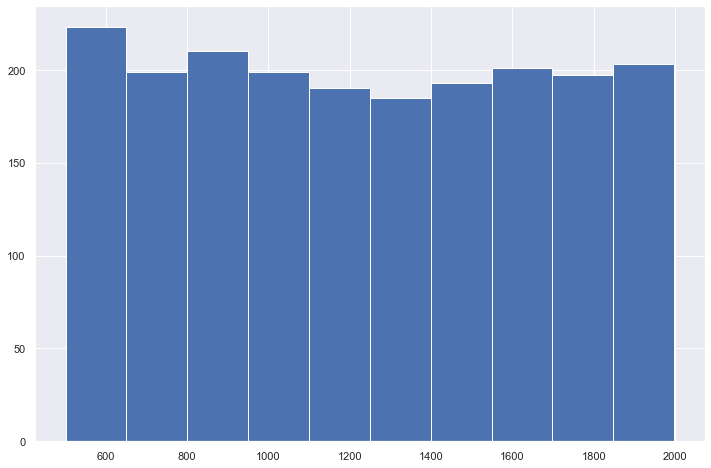

In [14]:
df['battery_power'].hist()

In [41]:
df.loc[df['sc_w'] == 0]
#df['sc_w'].hist()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
12,1815,0,2.8,0,2,0,33,0.6,159,4,...,607,748,1482,18,0,2,1,0,0,0
24,503,0,1.2,1,5,1,8,0.4,111,3,...,201,1245,2583,11,0,12,1,0,0,0
33,1310,1,2.2,1,0,1,51,0.6,100,4,...,178,1919,3845,7,0,12,1,1,0,1
42,1253,1,0.5,1,5,1,5,0.2,152,2,...,685,714,1878,15,0,4,1,1,0,0
50,1547,1,3.0,1,2,1,14,0.7,198,3,...,1042,1832,2059,5,0,15,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,772,0,1.0,1,0,1,23,0.6,97,7,...,317,1805,2782,7,0,17,1,0,0,1
1920,591,1,0.5,1,1,1,16,0.9,90,6,...,892,1603,3746,5,0,5,1,1,0,1
1946,590,1,1.2,1,0,0,32,0.4,141,6,...,227,509,1817,10,0,6,0,1,0,0
1954,686,1,2.7,1,0,0,36,0.1,194,4,...,64,745,1503,10,0,13,0,0,0,0


In [29]:
def calc_skewness(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Calculates skewness and kurtosis of numeric features in the dataframe
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        result of skewness and kurtosis of each variable in the dataset as a pandas dataframe
    '''

    skew, kurtosis, num_features = [], [], []
    for feature in df.columns:
        if df[feature].dtype.name != 'category':
            num_features.append(feature)
            skew.append(round(df[feature].skew(), 2))
            kurtosis.append(round(df[feature].kurtosis(), 2))

    skew_analysis = pd.DataFrame(data={
        'skewness': skew,
        'kurtosis': kurtosis
    }, index=num_features)

    return skew_analysis

calc_skewness(df)

,skewness,kurtosis
battery_power,0.03,-1.22
blue,0.02,-2.00
clock_speed,0.18,-1.32
dual_sim,-0.04,-2.00
fc,1.02,0.28
four_g,-0.09,-1.99
int_memory,0.06,-1.22
m_dep,0.09,-1.27
mobile_wt,0.01,-1.21
n_cores,0.00,-1.23


In [30]:
def handle_skewed_distributions(df):
    '''
    Apply square root to the skewed variables
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        the final dataframe with corrected skewed features
    '''
    
    df_copy = df.copy(deep=True)
    df_copy['fc_sqrt'] = np.sqrt(df['fc'])
    df_copy['px_height_sqrt'] = np.sqrt(df['px_height'])
    df_copy['px_width_sqrt'] = np.sqrt(df['px_width'])
    df_copy['sc_h_sqrt'] = np.sqrt(df['sc_h'])
    df_copy['sc_w_sqrt'] = np.sqrt(df['sc_w'])
    df_copy.drop(['fc', 'px_width', 'px_height', 'sc_w', 'sc_h'], inplace=True, axis=1)
    return df_copy

In [31]:
def add_features(df: pd.DataFrame) -> pd.DataFrame:
    '''
    Extract features form the original dataset
    Arguments:
        df is a n-by-d pandas data frame
    Returns:
        the final dataframe with extracted features
    '''

    df_copy = df.copy(deep=True)
    df_copy['px_whole_sqrt'] = df['px_width_sqrt'] * df['px_height_sqrt']
    df_copy['sc_whole_sqrt'] = df['sc_w_sqrt'] * df['sc_h_sqrt']
    df_copy['volume'] = df_copy['sc_whole_sqrt'] * np.sqrt(df['m_dep'])
    df_copy.drop(['px_width_sqrt', 'px_height_sqrt', 'sc_h_sqrt', 'sc_w_sqrt', 'm_dep'], axis=1, inplace=True)
    return df_copy

In [32]:
df_base = df.copy(deep=True)
df_final = df.copy(deep=True)
df_battery_binnded = df.copy(deep=True)
df_encoded = df.copy(deep=True)
df_transformed = df.copy(deep=True)
df_added_feature = df.copy(deep=True)

df_battery_binnded['battery_power_binnded'] = pd.cut(df_battery_binnded['battery_power'], bins=3, include_lowest=True, labels=False)
df_final['battery_power_binnded'] = pd.cut(df_final['battery_power'], bins=3, include_lowest=True, labels=False)

# For one-hot encoding task since there is no nominal variable there is no necessity to use 
# this technique. Also, the only feature that worth to be encoded this way is 'n_cores',
# other variables have either just 2 unique values or more than 15 unique values.
# However, this variable is ordinal and one-hot encoding is not appropriate for this type of variables.
df_encoded = pd.get_dummies(df_encoded, columns=['n_cores'], prefix='n_cores', drop_first=True)
df_final = pd.get_dummies(df_final, columns=['n_cores'], prefix='n_cores', drop_first=True)

df_transformed = handle_skewed_distributions(df_transformed)
df_final = handle_skewed_distributions(df_final)

df_added_feature['px_whole'] = df_added_feature['px_width'] * df_added_feature['px_height']
df_added_feature['sc_whole'] = df_added_feature['sc_w'] * df_added_feature['sc_h']
df_added_feature['volume'] = df_added_feature['sc_whole'] * df_added_feature['m_dep']
df_added_feature.drop(['px_width', 'px_height', 'sc_h', 'sc_w', 'm_dep'], axis=1, inplace=True)

df_final['px_whole_sqrt'] = df_final['px_width_sqrt'] * df_final['px_height_sqrt']
df_final['sc_whole_sqrt'] = df_final['sc_w_sqrt'] * df_final['sc_h_sqrt']
df_final['volume'] = df_final['sc_whole_sqrt'] * np.sqrt(df_final['m_dep'])
df_final.drop(['px_width_sqrt', 'px_height_sqrt', 'sc_h_sqrt', 'sc_w_sqrt', 'm_dep'], axis=1, inplace=True)

In [33]:
results_cols = ['Dataset', 'Train f1 score', 'Test f1 score', 'Train precision', 'Test precision', 'Train recall', 'Test recall']
results = pd.DataFrame(columns=results_cols)

def report_influence(df: pd.DataFrame, name: str) -> None:
    index = len(results)
    results.loc[index, 'Dataset'] = name

    df_X = df.drop('price_range', axis=1)
    df_y = df['price_range']
    X_train, X_test, y_train, y_test = train_test_split(df_X, df_y,test_size=0.2, stratify=df_y, random_state=42)

    scaler = MinMaxScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
    X_test_scaled = scaler.transform(X_test)
    X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

    X_train = convert_types(X_train)
    X_test = convert_types(X_test)

    svc = SVC()
    svc.fit(X_train, y_train)
    predictions_train = svc.predict(X_train)
    results.loc[index, 'Train f1 score'] = f1_score(y_train, predictions_train, average='macro')
    results.loc[index, 'Train precision'] = precision_score(y_train, predictions_train, average='macro')
    results.loc[index, 'Train recall'] = recall_score(y_train, predictions_train, average='macro')

    predictions_test = svc.predict(X_test)
    results.loc[index, 'Test f1 score'] = f1_score(y_test, predictions_test, average='macro')
    results.loc[index, 'Test precision'] = precision_score(y_test, predictions_test, average='macro')
    results.loc[index, 'Test recall'] = recall_score(y_test, predictions_test, average='macro')

In [34]:
report_influence(df_base, "Base dataset (without feature engineering)")
report_influence(df_battery_binnded, "Battery power feature binnded into 3 bins")
report_influence(df_encoded, "One hot encoding for n_cores feature")
report_influence(df_transformed, "Transformed skewed distributions")
report_influence(df_added_feature, "Extracted features")
report_influence(df_final, "Mixture of all of the above")

results

,Dataset,Train f1 score,Test f1 score,Train precision,Test precision,Train recall,Test recall
0,Base dataset (without feature engineering),0.991875,0.959991,0.991894,0.960414,0.991875,0.96
1,Battery power feature binnded into 3 bins,0.990625,0.952497,0.990632,0.952602,0.990625,0.9525
2,One hot encoding for n_cores feature,0.99,0.964996,0.990012,0.965186,0.99,0.965
3,Transformed skewed distributions,0.990625,0.957487,0.990644,0.958061,0.990625,0.9575
4,Extracted features,0.983125,0.947492,0.983144,0.94778,0.983125,0.9475
5,Mixture of all of the above,0.985625,0.944978,0.985686,0.945713,0.985625,0.945


Third dataset (One hot encoding for n_cores feature) has the best results among the others for the svm classifier.